# Importing Data
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Separating Features and Target Variable

In [4]:
X = data.iloc[:,:-1] 

In [5]:
X
print(X.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object


In [6]:
y = data.iloc[:,-1]

In [7]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    Yes
Name: RainTomorrow, Length: 145460, dtype: object

# Handling Missing data

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan , strategy = 'mean')

In [9]:
numerical_cols = list(np.where((X.dtypes == np.int64) | (X.dtypes == np.float64))[0])

numerical_cols

[2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [10]:
imp_mean.fit(X.iloc[:,numerical_cols]) # now, fitting mean value in place of nan values based on the column which have numeric values

SimpleImputer()

In [11]:
X.iloc[:,numerical_cols] = imp_mean.transform(X.iloc[:,numerical_cols]) # updating/transforming the actual data i.e, X

# Handling Missing String data

In [12]:
imp_mean = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')

In [13]:
string_cols = list((np.where(X.dtypes ==object))[0])
string_cols  

[0, 1, 7, 9, 10, 21]

In [14]:
imp_mean.fit(X.iloc[:,string_cols])

SimpleImputer(strategy='most_frequent')

In [15]:
X.iloc[:,string_cols] = imp_mean.transform(X.iloc[:,string_cols])

In [16]:
pd.isnull(X).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [17]:
# Checking correlation
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [18]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# OneHotEncoder Method

In [19]:
def OneHotEncoderMethod(indices,data):
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    ColumnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices)],remainder = 'passthrough')
    return ColumnTransformer.fit_transform(data)

# Label Encoding Method

In [20]:
def LabelEncodingMethod(series):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(series)
    #print('Actual labels :',le.classes_)
    #print('Encoding values :',le.transform(pd.unique(series)))
    return le.fit_transform(series)

## Label encoding target feature

In [21]:
y = LabelEncodingMethod(y)

# Encoding Selection for X

In [22]:
def EncodingSelection(X,threshold =10):
    #Step 1: selecting the columns
    string_cols = list((np.where(X.dtypes ==object))[0])
    one_hot_encoding_indices = []
    
    #Step 2: if the no. of category is 2 and more than threshold, then label encode
    for col in string_cols:
        length = len(pd.unique(X[X.columns[col]]))
        if length == 2 or length > threshold:
            X[X.columns[col]] = LabelEncodingMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
    #Step 3: OneHotEncoding
    X = OneHotEncoderMethod(one_hot_encoding_indices,X)
    return X

In [23]:
X = EncodingSelection(X)

In [24]:
X.shape

(145460, 22)

In [25]:
# sns.heatmap(data.corr())

# Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
kbest = SelectKBest(score_func = chi2 , k = 10)

In [28]:
# To remove negative values we do MinMaxScaler feature scaling

In [29]:
from sklearn import preprocessing
MMS = preprocessing.MinMaxScaler()

In [30]:
x_temp = MMS.fit_transform(X)

In [31]:
x_temp = kbest.fit(x_temp,y)

In [32]:
x_temp.scores_

array([5.53592272e-01, 2.62652284e-01, 4.53531570e+01, 1.15859992e+02,
       6.11887959e+02, 1.35548180e+01, 9.84913277e+02, 1.07864803e+02,
       2.79274919e+02, 3.21530177e+01, 2.80820766e+01, 5.56950536e+01,
       5.24986468e+01, 4.59639631e+02, 2.13382870e+03, 1.47533629e+02,
       1.14483749e+02, 1.14726932e+03, 1.34238912e+03, 2.93206049e+00,
       1.61502894e+02, 9.17357045e+03])

In [33]:
for i in np.sort(x_temp.scores_):
    print('{0:.10f}'.format(i))

0.2626522842
0.5535922719
2.9320604930
13.5548180342
28.0820766103
32.1530176873
45.3531570313
52.4986467818
55.6950536337
107.8648029295
114.4837487410
115.8599915938
147.5336287930
161.5028938629
279.2749190555
459.6396308554
611.8879589902
984.9132774372
1147.2693154468
1342.3891164374
2133.8286978853
9173.5704489390


In [34]:
np.argsort(x_temp.scores_)

array([ 1,  0, 19,  5, 10,  9,  2, 12, 11,  7, 16,  3, 15, 20,  8, 13,  4,
        6, 17, 18, 14, 21], dtype=int64)

In [35]:
k_features = 12
best_features = np.argsort(x_temp.scores_)[-k_features:]
features_to_delete = np.argsort(x_temp.scores_)[:-k_features]

In [36]:
features_to_delete

array([ 1,  0, 19,  5, 10,  9,  2, 12, 11,  7], dtype=int64)

In [37]:
# Delete columns which are not useful
X = np.delete(X, features_to_delete, axis =1)

In [38]:
X.shape

(145460, 12)

In [39]:
del x_temp

# Train test split

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size =0.2, random_state =1)

In [42]:
print(X_train.shape)

(116368, 12)


# Feature Scaling

In [43]:
from sklearn import preprocessing

In [44]:
sc = preprocessing.StandardScaler(with_mean=False)

In [45]:
sc.fit(X_train)

StandardScaler(with_mean=False)

In [46]:
X_train = sc.transform(X_train)

In [47]:
print(X_train.shape)

(116368, 12)


In [48]:
X_test = sc.transform(X_test)

In [49]:
print(X_test.shape)

(29092, 12)


####  Data is ready !!!

In [50]:
from sklearn.metrics import accuracy_score

# Building KNN model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train,y_train)
y_pred = KNNClassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.812388285439296

# Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression(random_state = 0, max_iter = 200)
LRM.fit(X_train, y_train)
y_pred = LRM.predict(X_test)
accuracy_score(y_pred, y_test)

0.8241784683074385

# GaussianNB Model

In [53]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred = model_GNB.predict(X_test)
accuracy_score(y_pred, y_test)

0.7915234428708924

# Building SVM (SVC) Model

In [54]:
#This model is taking too much time that's why commented
# from sklearn.svm import SVC
# model_SVC = SVC()
# model_SVC.fit(X_train, y_train)
# y_pred = model_SVC.predict(X_test)
# accuracy_score(y_pred, y_test)

# Building Decision Tree Classification Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier(max_depth = 7)
model_DTC.fit(X_train, y_train)
y_pred = model_DTC.predict(X_test)
accuracy_score(y_pred, y_test)

0.8362436408634676

# Building Random Forest Tree Classifier Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators =500,max_depth = 7)
model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)
accuracy_score(y_pred, y_test)

0.8403341124707824

# Building AdaBoostClassifier Model

In [59]:
from sklearn.ensemble import AdaBoostClassifier
model_ABC = AdaBoostClassifier()
model_ABC.fit(X_train, y_train)
y_pred = model_ABC.predict(X_test)
accuracy_score(y_pred, y_test)

0.8351436821119208

# Building XGBoostClassifier Model
#####Not inside sklearn

In [62]:
import xgboost as xgb
model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred = model_XGB.predict(X_test)
accuracy_score(y_pred, y_test)

0.8486525505293552

# Visualization

In [90]:
# Decision regions visualization code
# pip install mlxtend

def visualization_decision_regions(X, y, model):
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.pyplot as plt
    # Plotting decision regions
    plot_decision_regions(X, y, clf = model)
    
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


In [91]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,:2] #taking first two feature only in order to plot decision regions
y = iris.target

KNN_V = KNeighborsClassifier(n_neighbors=3)
KNN_V.fit(X, y)

LRM_V = LogisticRegression(random_state = 0, max_iter = 200)
LRM_V.fit(X, y)

GNB_V = GaussianNB()
GNB_V.fit(X, y)

# SVC_V = SVC()
# SVC_V.fit(X, y)

DTC_V = DecisionTreeClassifier(max_depth = 7)
DTC_V.fit(X, y)

RFC_V = RandomForestClassifier(n_estimators =500,max_depth = 7)
RFC_V.fit(X, y)

ABC_V = AdaBoostClassifier()
ABC_V.fit(X, y)

XGB_V = xgb.XGBClassifier()
XGB_V.fit(X, y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

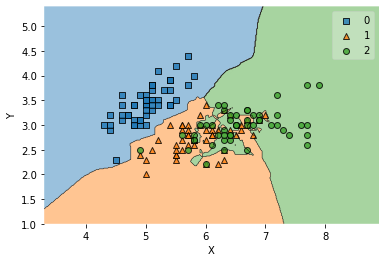

In [92]:
visualization_decision_regions(X, y, KNN_V)

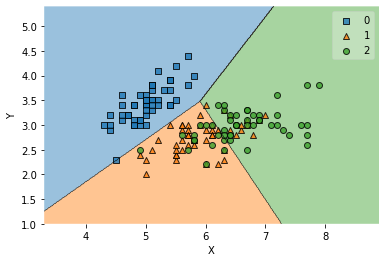

In [93]:
visualization_decision_regions(X, y, LRM_V)

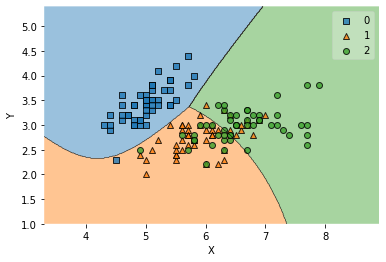

In [94]:
visualization_decision_regions(X, y, GNB_V)

In [95]:
# visualization_decision_regions(X, y, SVC_V)

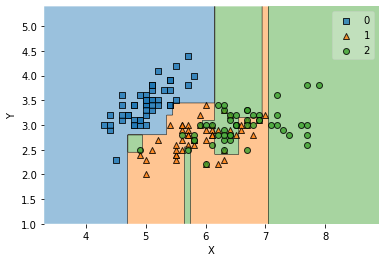

In [96]:
visualization_decision_regions(X, y, DTC_V)

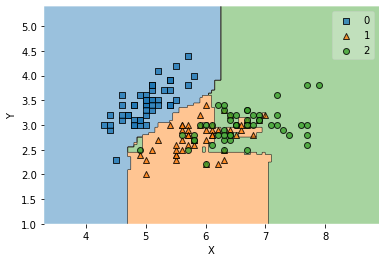

In [97]:
visualization_decision_regions(X, y, RFC_V)

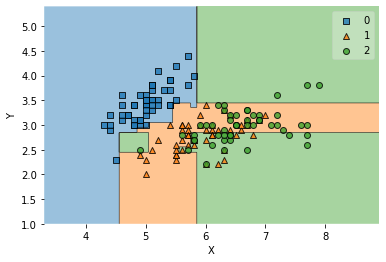

In [98]:
visualization_decision_regions(X, y, ABC_V)

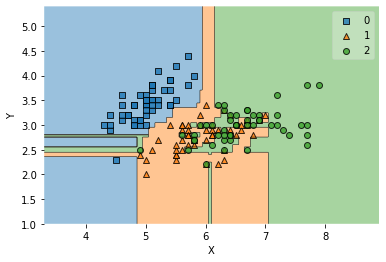

In [99]:
visualization_decision_regions(X, y, XGB_V)